In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import math

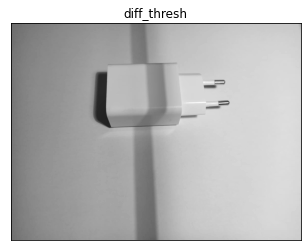

In [2]:
frame = cv2.imread('../imgs/charger1.jpg')
frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(frame_gray, cmap='gray', vmin=0)
plt.title('diff_thresh'), plt.xticks([]), plt.yticks([])
plt.show()

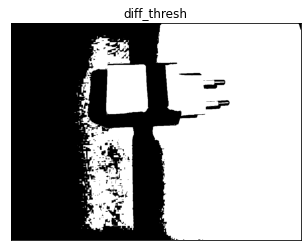

In [3]:
kernel_size = 7
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(kernel_size,kernel_size))
cl1 = clahe.apply(frame_gray)
ret, thresh = cv2.threshold(cl1,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray', vmin=0)
plt.title('diff_thresh'), plt.xticks([]), plt.yticks([])
plt.show()

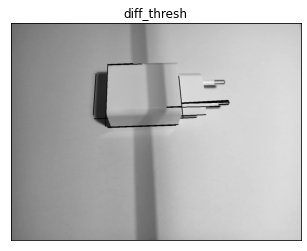

In [4]:
frame_gray_copy = frame_gray.copy()

edges = cv2.Canny(frame_gray_copy,5,45,apertureSize = 3, L2gradient = True)
lines = cv2.HoughLinesP(edges,1,np.pi/180,50,minLineLength=20,maxLineGap=100)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(frame_gray_copy,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(frame_gray_copy, cmap='gray', vmin=0)
plt.title('diff_thresh'), plt.xticks([]), plt.yticks([])
plt.show()

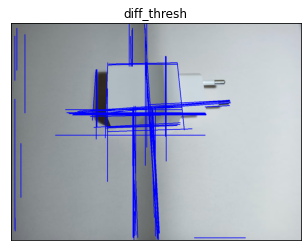

In [24]:
frame_gray_copy = frame.copy()

edges = cv2.Canny(cl1,15,30,apertureSize = 3, L2gradient = True)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=20,maxLineGap=70)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(frame_gray_copy,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(frame_gray_copy, vmin=0)
plt.title('diff_thresh'), plt.xticks([]), plt.yticks([])
plt.show()

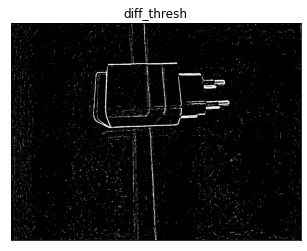

In [6]:
frame_gray_copy = cl1.copy()
frame_gray_copy = cv2.medianBlur(frame_gray_copy,7)

adaptiveThreshold = ~cv2.adaptiveThreshold(frame_gray_copy,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,9,1.5)

plt.imshow(adaptiveThreshold, cmap='gray', vmin=0)
plt.title('diff_thresh'), plt.xticks([]), plt.yticks([])
plt.show()

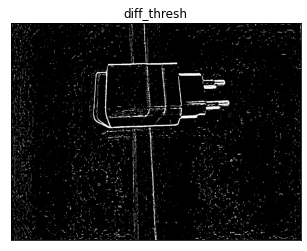

In [7]:
opening = cv2.morphologyEx(adaptiveThreshold, cv2.MORPH_DILATE, (10,10))

plt.imshow(opening, cmap='gray', vmin=0)
plt.title('diff_thresh'), plt.xticks([]), plt.yticks([])
plt.show()

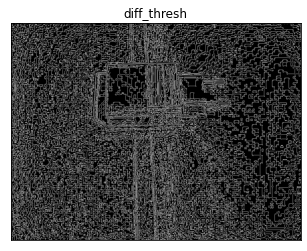

In [12]:

plt.imshow(edges, vmin=0, cmap='gray')
plt.title('diff_thresh'), plt.xticks([]), plt.yticks([])
plt.show()

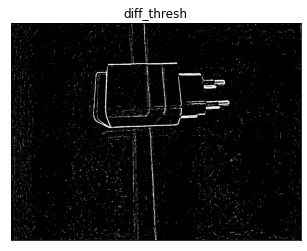

In [13]:
frame_gray_copy = frame.copy()

edges = cv2.Canny(adaptiveThreshold,20,40,apertureSize = 3, L2gradient = True)
lines = cv2.HoughLinesP(edges,1,np.pi/180,150,minLineLength=25,maxLineGap=100)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(frame_gray_copy,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(adaptiveThreshold, vmin=0, cmap='gray')
plt.title('diff_thresh'), plt.xticks([]), plt.yticks([])
plt.show()

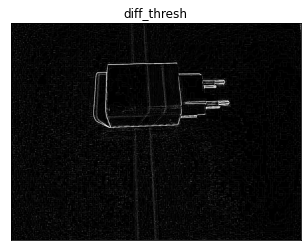

In [18]:
filtered_image = cv2.Laplacian(frame_gray, ksize=5, ddepth=cv2.CV_8U)

opening = cv2.morphologyEx(filtered_image, cv2.MORPH_DILATE, (10,10))

plt.imshow(filtered_image, vmin=0, cmap='gray')
plt.title('diff_thresh'), plt.xticks([]), plt.yticks([])
plt.show()

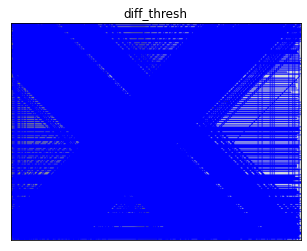

In [15]:
frame_gray_copy = frame.copy()

edges = cv2.Canny(filtered_image,20,40,apertureSize = 3, L2gradient = True)
lines = cv2.HoughLinesP(edges,1,np.pi/180,150,minLineLength=25,maxLineGap=100)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(frame_gray_copy,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(frame_gray_copy, vmin=0)
plt.title('diff_thresh'), plt.xticks([]), plt.yticks([])
plt.show()